# House Price Prediction for King County(USA) using Linear Regression Techniques

This notebook is described further in three parts:

Part 1: Exploratory Data Analysis

Part 2: This notebook presents a thought process of predicting a prices of houses using Machine Learning model.
Linear Regression algorithm has been used for price prediction.

Part 3: Conclusion

Dataset Source : Kaggle [https://www.kaggle.com/harlfoxem/housesalesprediction]
-Seattle is located in King County


### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.show()
%matplotlib inline

## Part 1 : Exploratory Data Analysis

In [6]:
# Import csv file into dataframe
df = pd.read_csv('kc_house_data.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



**All columns contain numeric data, so there is no need to further change the data values. 
Let's check if this dataset contains any missing data**


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


** Data is clean, No Missing data. Let's get data summary**

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Correlation

In [34]:
df.corr()[1:2]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.0,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


## Top five columns correlation with House Price
**sqft_living = 0.702035 , 
grade = 0.667434 , 
sqft_above = 0.605567 , 
sqft_living15 = 0.585379 , 
bathrooms = 0.525138**



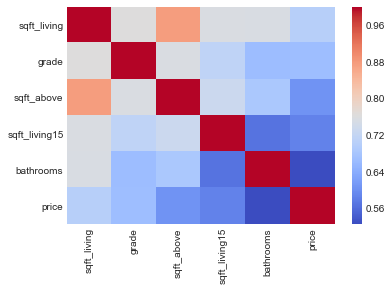

In [61]:
sns.heatmap(df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'price']].corr(), cmap='coolwarm')

In [40]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
import warnings
warnings.filterwarnings("ignore")

** Let's use seaborn to create a jointplot to compare the number of sqft_living and House Price columns. Does this correlation make sense?**

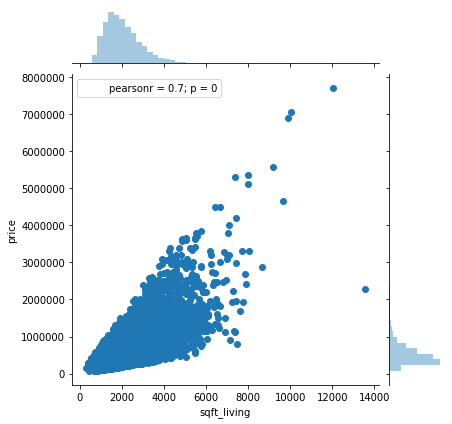

In [38]:
sns.jointplot(x='sqft_living',y='price',data=df)

** Let's plot grade and price **

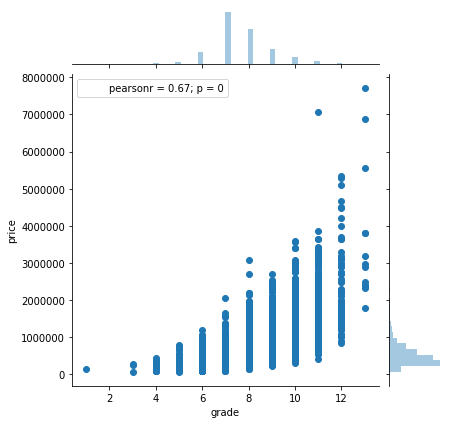

In [39]:
sns.jointplot(x='grade',y='price',data=df)

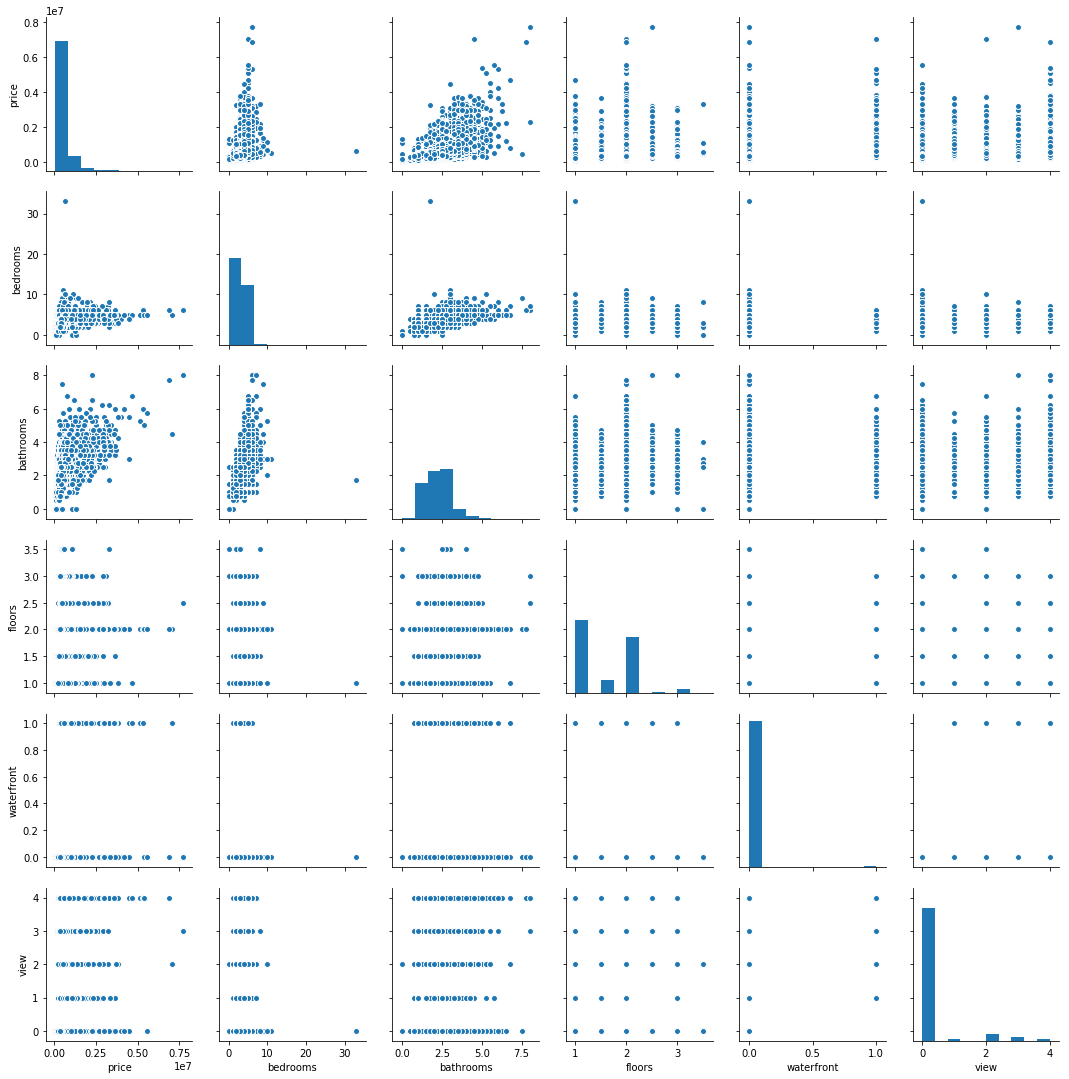

In [43]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']])

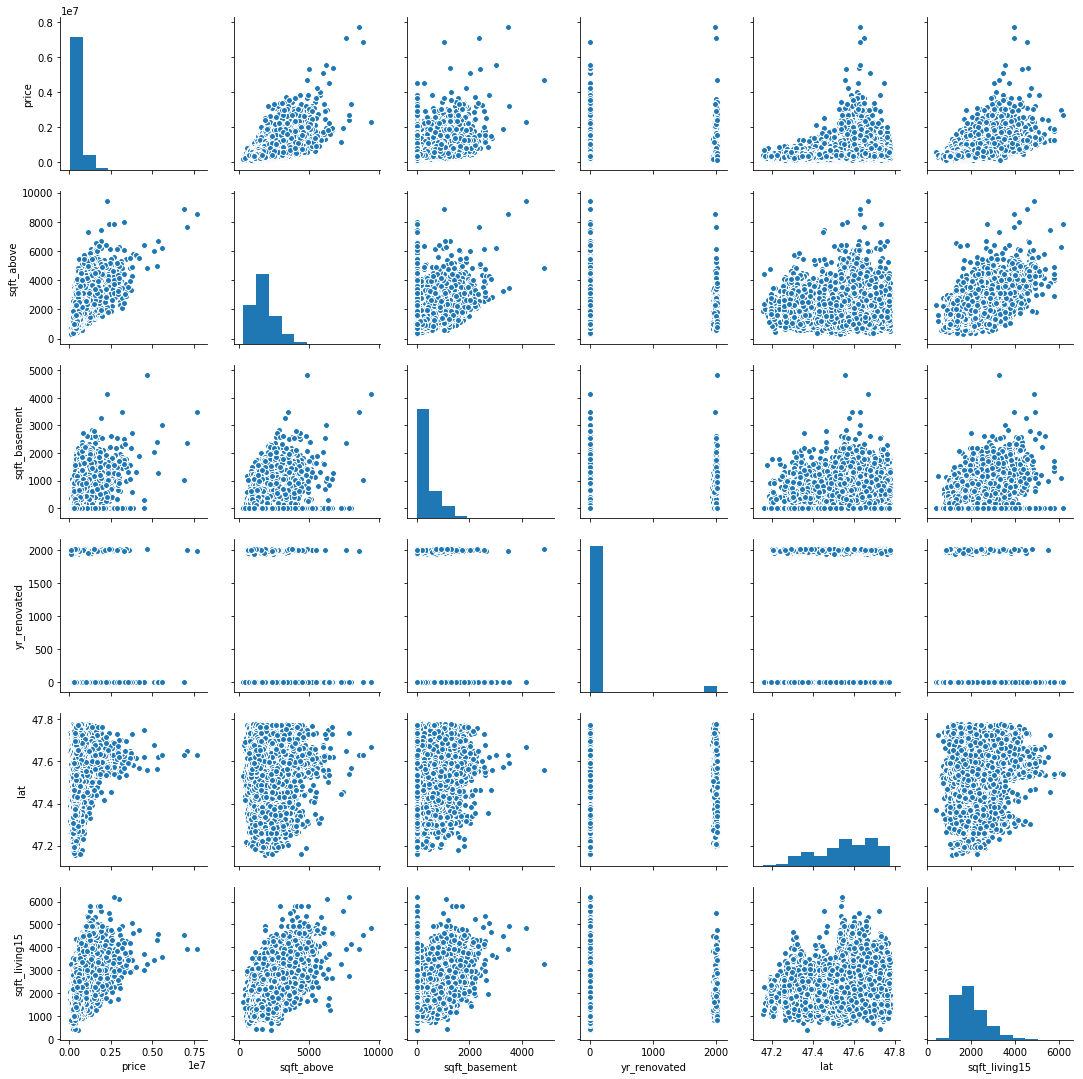

In [44]:
sns.pairplot(df[['price','sqft_above', 'sqft_basement', 'yr_renovated','lat', 'sqft_living15']])

In [52]:
sns.set_style('whitegrid')

**Sqft_Living Column is very strongly correlated with Price Column**

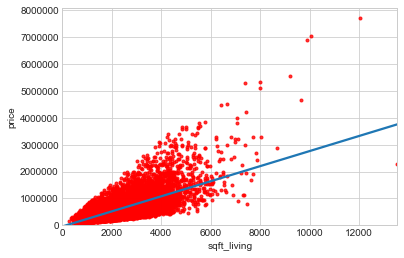

In [55]:
sns.regplot(df.sqft_living, df.price, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,13540)
plt.ylim(ymin=0);

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. 

### X and y arrays

In [65]:
#Using all features to train model for Linear Regression 
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [66]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Creating and Training the Model

In [68]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

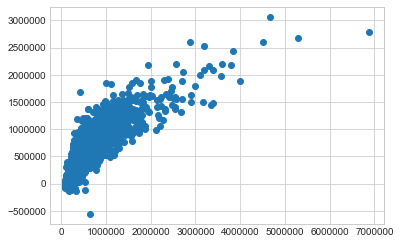

In [69]:
plt.scatter(y_test,predictions)

**Residual Histogram**

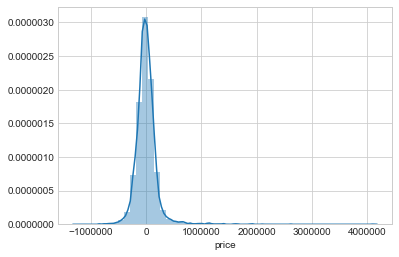

In [77]:
sns.distplot((y_test-predictions),bins=50);

In [81]:
print('Intercept:',lm.intercept_)

Intercept: 6940727.330331465


In [88]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-36990.967561
bathrooms,36276.499443
sqft_living,109.737357
sqft_lot,0.142873
floors,11371.106169
waterfront,553445.884033
view,51723.468439
condition,29097.963996
grade,96102.079131
sqft_above,70.930690


Interpreting the coefficients:

Examples:
- Holding all other features fixed, a 1 unit increase in **Bathrooms** is associated with an **increase of 36276 dollars in house price**.
- Holding all other features fixed, a 1 unit increase in **Sqft_Living** is associated with an **increase of 109 dollars in house price**.
- Holding all other features fixed, a 1 unit increase in **Grade** is associated with an **increase of 96102 dollars in house price**.
- Holding all other features fixed, a 1 unit increase in **Sqft_Living15** is associated with an **increase of 24 dollars in house price**.
- Holding all other features fixed, a 1 unit increase in **Sqft_Above** is associated with an **increase of 70 dollars in house price**.


## Regression Evaluation Metrics

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [76]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 124598.02116050443
MSE: 41146945794.42311
RMSE: 202847.09954648872


## R2 Score 

In [80]:
from sklearn.metrics import r2_score
print('R2 Score : ',r2_score(y_test, predictions))

R2 Score :  0.7097583909084128


## Conclusion

## Results : R2 Score value is 70.9% which is a good indication to predict house prices with Linear Regression model under given features. 

Note : This score can change based on data variability. 